In [1]:
#Importing required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras.layers.core import Dropout, Activation, Dense, Flatten
from keras.models import Sequential
from sklearn.metrics import accuracy_score

In [2]:
(x_train, y_train), (x_test,y_test) = datasets.fashion_mnist.load_data()

In [3]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train_reshaped = x_train.reshape(60000,784)
x_test_reshaped = x_test.reshape(10000,784)

(array([386.,   8.,  21.,  10.,  16.,   8.,  30.,  72., 187.,  46.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

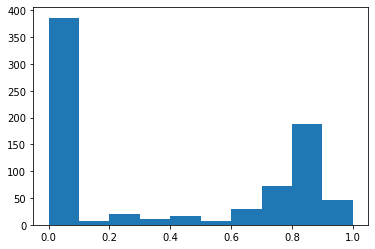

In [7]:
plt.hist(x_train_reshaped[0])

In [8]:
print(y_train[0])

9


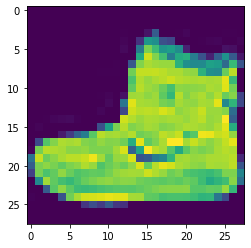

In [9]:
plt.imshow(x_train[0])

In [10]:
classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Boot', 'Ankle boot']

In [11]:
#Building the model
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(784))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [12]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [13]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4776 - accuracy: 0.8282
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3568 - accuracy: 0.8700
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3234 - accuracy: 0.8806
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2972 - accuracy: 0.8896
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2791 - accuracy: 0.8961
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2666 - accuracy: 0.8992
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2537 - accuracy: 0.9054
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2428 - accuracy: 0.9092
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2322 - accuracy: 0.9122
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

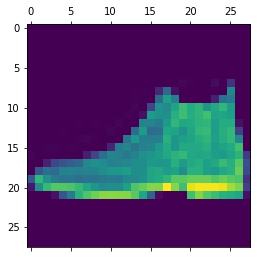

In [14]:
y_predict = model.predict(x_test)
y_predicted = [np.argmax(element) for element in y_predict]

plt.matshow(x_test[0])

In [15]:
y_predicted[0]

9

In [16]:
y_test[0]

9

In [18]:
accuracy_score(y_predicted,y_test)

0.8895

In [21]:
#further analysis with confusion matrix
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[849,   2,   8,  30,   5,   0,  97,   0,   9,   0],
       [  2, 969,   0,  24,   2,   0,   2,   0,   1,   0],
       [ 20,   0, 815,  12,  80,   0,  68,   0,   5,   0],
       [ 19,   3,  11, 904,  43,   0,  12,   0,   8,   0],
       [  1,   2, 100,  25, 819,   0,  44,   0,   9,   0],
       [  0,   0,   0,   0,   0, 957,   0,  19,   0,  24],
       [127,   0,  79,  32,  69,   0, 680,   0,  13,   0],
       [  0,   0,   0,   0,   0,  15,   0, 967,   0,  18],
       [  5,   0,   2,   5,   2,   1,   4,   2, 979,   0],
       [  0,   0,   0,   1,   0,   2,   1,  40,   0, 956]])>

Text(33.0, 0.5, 'Truth')

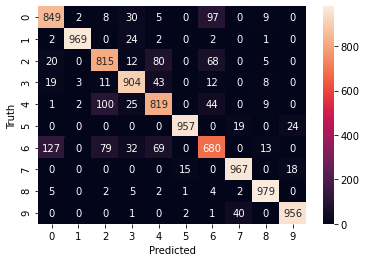

In [23]:
import seaborn as sns
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#here you can see its predicted as 2 but the truth value is '4' about 100 cases.....